In [2]:
#Read imports-85.data into a dataframe, cars, assigning columns parameter to predetermined column headers from the datasource.
import pandas as pd
columns = ['symboling','normalized_losses','make', 'fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width', 'height','curb_weight','engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke','compression_ratio','horsepower','peak_rpm','city_mpg', 'highway_mpg','price']
cars = pd.read_csv("imports-85.data", names=columns)
cars.head()


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Numeric columns - features and target columns

Based on the preview of the cars dataset, the columns that could be used as features in a machine learning model could be: normalized_losses, wheel_base, length, width, height, curb_weight, engine_size, bore, stroke, compression_ratio, horsepower, peak_rpm, city_mpg, and highway_mpg. 

The price column should be the target column.

We usually can't have missing values in predictive modeling. Based on the data preview, there is missing information in the normalized-losses column. To clean this, we will replace these missing values and look for other missing values in numeric columns. We will also rescale all values to range from 0 to 1.


In [4]:
import numpy as np
cars= cars.replace('?', np.nan)
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

## Column types in cars dataset

The table above shows all of the types for the cars columns. For the feature columns I would like to examine, I will need to convert the following to floats: normalized_losses, bore, stroke, horsepower, peak_rpm, and price.


In [5]:
numeric_columns = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
cars_numeric = cars[numeric_columns]

In [6]:
cars_numeric.isnull().sum()
#It appears that 41 out of 204 rows in Normalized_Losses have missing values. I will choose to drop the column from the dataset, instead of using the avg value or dropping the rows.
#I will need to explore what other numeric columns have missing values.

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [7]:
##I removed rows with missing prices, as this is the target feature for the model.

cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric = cars_numeric.astype('float')
cars_numeric.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [8]:
#for the missing values in the dataset, I plugged in the column mean.
cars_numeric = cars_numeric.fillna((cars_numeric.mean()), inplace=True)

In [9]:
cars_numeric.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [10]:
#Normalized columns with range 0 to 1, except for price (target column)
price_col = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = price_col

In [11]:
#created a function w/ three parameters that encapsulates the training and simple validation process.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
def knn_train_test(training, target, dataframe_object):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe_object.index)
    rand_df = dataframe_object.reindex(shuffled_index)
    
    train_cars = dataframe_object.iloc[0:150]
    test_cars = dataframe_object.iloc[150:]
    knn.fit(train_cars[[training]], train_cars[target])
    predictions = knn.predict(test_cars[[training]])
    one_feature_mse = mean_squared_error(test_cars[target], predictions)
    one_feature_rmse = one_feature_mse ** (1/2)
    return one_feature_rmse

train_cols = cars_numeric.drop(['price'], axis=1)
rmse_results = {}

for c in train_cols:
    rmse = knn_train_test(c, 'price', cars_numeric)
    rmse_results[c] = rmse
rmse_results

    
                                        
    
    

{'bore': 8173.1677172389927,
 'city_mpg': 3635.9338845128937,
 'compression_ratio': 5676.2812812200746,
 'curb_weight': 2467.1015390375746,
 'height': 6575.6811825177201,
 'highway_mpg': 2890.5559529029615,
 'horsepower': 3822.8885837703365,
 'length': 6931.0799645721963,
 'normalized_losses': 9165.3720971499934,
 'peak_rpm': 7112.6658995366406,
 'stroke': 7674.2126108717339,
 'wheel_base': 5600.275810224728,
 'width': 3816.7939591068457}

In [13]:
# I modified the function above to accept a parameter for k value.
k_rmse_results = {}
def knn_train_test(training, target, dataframe_object):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe_object.index)
    rand_df = dataframe_object.reindex(shuffled_index)
    
    train_cars = dataframe_object.iloc[0:150]
    test_cars = dataframe_object.iloc[150:]
    
    k_values = [1,3,5,7,9]
    k_rmse = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_cars[[training]], train_cars[[target]])
        predictions = knn.predict(test_cars[[training]])
        k_feature_mse = mean_squared_error(test_cars[target], predictions)
        k_feature_rmse = k_feature_mse ** (1/2)
        k_rmse[k] = k_feature_rmse
    return k_rmse

train_cols = cars_numeric.drop(['price'], axis=1)
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', cars_numeric)
    k_rmse_results[col] = rmse_val
k_rmse_results

{'bore': {1: 7501.2588721271759,
  3: 9582.4777842601216,
  5: 8173.1677172389927,
  7: 7789.2318468707635,
  9: 6517.1762684958403},
 'city_mpg': {1: 5352.0667439198241,
  3: 3513.8566690506614,
  5: 3635.9338845128937,
  7: 3419.6128029776878,
  9: 3292.4684712581534},
 'compression_ratio': {1: 9685.3038945307107,
  3: 4311.2826152632388,
  5: 5676.2812812200746,
  7: 6623.0116230294743,
  9: 6261.6263394320777},
 'curb_weight': {1: 3708.950345672838,
  3: 2512.7548895736436,
  5: 2467.1015390375746,
  7: 2654.0573859363212,
  9: 2635.0344097095631},
 'height': {1: 11902.790106261871,
  3: 8573.6198498053345,
  5: 6575.6811825177201,
  7: 6255.2948201115669,
  9: 5494.6852283946373},
 'highway_mpg': {1: 4197.2298217360685,
  3: 3951.1269341934503,
  5: 2890.5559529029615,
  7: 2520.4574783876328,
  9: 2357.0253997212271},
 'horsepower': {1: 4944.2978367043397,
  3: 4260.5322621548994,
  5: 3822.8885837703365,
  7: 3937.8279681624913,
  9: 3660.4645019956647},
 'length': {1: 8344.6803

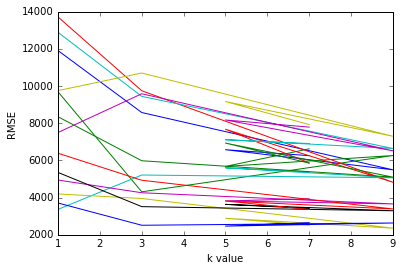

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
plt.show()

In [19]:
#modified function to accept a list of column names, instead of a string.
k_rmse_results = {}
def knn_train_test(training, target, dataframe_object):
    np.random.seed(1)
    shuffled_index = np.random.permutation(dataframe_object.index)
    rand_df = dataframe_object.reindex(shuffled_index)
    
    train_cars = dataframe_object.iloc[0:150]
    test_cars = dataframe_object.iloc[150:]
        
    knn = KNeighborsRegressor()
    knn.fit(train_cars[training], train_cars[target])
    predictions = knn.predict(test_cars[training])
    feature_mse = mean_squared_error(test_cars[target], predictions)
    feature_rmse = feature_mse ** (1/2)
    return feature_rmse

train_cols = cars_numeric.drop(['price'], axis=1)

top_two = ['curb_weight', 'highway_mpg']
top_three = ['curb_weight', 'highway_mpg', 'city_mpg']
top_four = ['curb_weight', 'highway_mpg', 'city_mpg', 'width']
top_five = ['curb_weight', 'highway_mpg', 'city_mpg', 'width', 'horsepower']

rmse_val_two = knn_train_test(top_two, 'price', cars_numeric)
k_rmse_results["top two"] = rmse_val_two

rmse_val_three = knn_train_test(top_three, 'price', cars_numeric)
k_rmse_results["top three"] = rmse_val_three

rmse_val_four = knn_train_test(top_four, 'price', cars_numeric)
k_rmse_results["top four"] = rmse_val_four

rmse_val_five = knn_train_test(top_five, 'price', cars_numeric)
k_rmse_results["top five"] = rmse_val_five

k_rmse_results

{'top five': 2099.9169580219677,
 'top four': 2371.3760332305778,
 'top three': 2276.0853104381122,
 'top two': 3071.6276959854845}

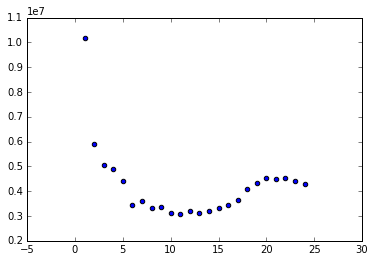

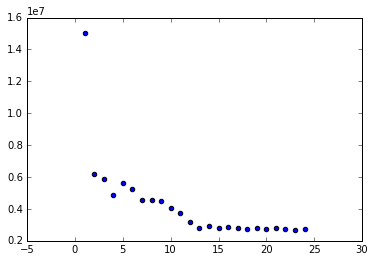

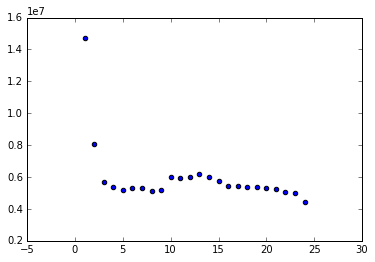

In [27]:
# top three models use three, four, and five features. 
#Below I varied the hyperparameter value from 1 to 25 and plotted the resulting RMSE values.

features = ['curb_weight', 'highway_mpg', 'city_mpg', 'width', 'horsepower']
hyper_params = [x for x in range(1, 25)]
train_cars = cars_numeric.iloc[0:150]
test_cars = cars_numeric.iloc[150:]
mse_values = list()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp)
    knn.fit(train_cars[features], train_cars['price'])
    predictions = knn.predict(test_cars[features])
    mse = mean_squared_error(test_cars['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params, mse_values)
plt.show()

features = ['curb_weight', 'highway_mpg', 'city_mpg', 'width']
hyper_params = [x for x in range(1, 25)]
train_cars = cars_numeric.iloc[0:150]
test_cars = cars_numeric.iloc[150:]
mse_values = list()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp)
    knn.fit(train_cars[features], train_cars['price'])
    predictions = knn.predict(test_cars[features])
    mse = mean_squared_error(test_cars['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params, mse_values)
plt.show()

features = ['curb_weight', 'highway_mpg', 'city_mpg']
hyper_params = [x for x in range(1, 25)]
train_cars = cars_numeric.iloc[0:150]
test_cars = cars_numeric.iloc[150:]
mse_values = list()
for hp in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=hp)
    knn.fit(train_cars[features], train_cars['price'])
    predictions = knn.predict(test_cars[features])
    mse = mean_squared_error(test_cars['price'], predictions)
    mse_values.append(mse)
plt.scatter(hyper_params, mse_values)
plt.show()


# Optimal K value

Based on observing the top 3 models, it seems that for a five-feature model, a k-value of 10 is most optimal. For a four-feature model, a k-value of 13 is most optimal. For a three-feature model, a k-value of 4 is most optimal.
